In [1]:
import os
import glob
import spacy
from top2vec import Top2Vec
from tqdm import tqdm

from config import Config
from risk_detection.analysis.doc_processor import RiskSectionCleaner

In [2]:
risk_files = glob.glob(os.path.join(Config.risk_dir(), '10k20f_5', '*.txt'))

In [3]:
cleaner = RiskSectionCleaner()

In [4]:
corpus = {}
for risk_file in tqdm(risk_files):
    with open(risk_file, 'r', encoding='utf-8') as risk_f:
        doc_text = risk_f.read()
    corpus[risk_file.split('\\')[-1]] = doc_text

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3096/3096 [00:05<00:00, 600.05it/s]


In [5]:
doc_ids, docs = list(zip(*corpus.items()))

In [12]:
model = Top2Vec(documents=list(docs), document_ids=list(doc_ids), speed='learn', workers=16, tokenizer=cleaner, min_count=15)

2021-02-09 22:48:20,776 - top2vec - INFO - Pre-processing documents for training
2021-02-09 23:51:21,464 - top2vec - INFO - Creating joint document/word embedding
2021-02-10 00:09:11,830 - top2vec - INFO - Creating lower dimension embedding of documents
2021-02-10 00:09:27,828 - top2vec - INFO - Finding dense areas of documents
2021-02-10 00:09:27,965 - top2vec - INFO - Finding topics


In [13]:
model.get_topics()

(array([['solution', 'application suite', 'software', ..., 'renewal rate',
         'indirect sale channel', 'internet infrastructure'],
        ['following event', 'additional risk', 'risk', ...,
         'other filing', 'such hedging transaction',
         'political and social instability'],
        ['unitholder', 'common unit', 'contentsindex', ..., 'phillips',
         'quarterly cash distribution', 'refinery'],
        ...,
        ['semiconductor industry', 'semiconductor', 'taiwan', ...,
         'customer requirement', 'an environment', 'high gross margin'],
        ['datum center facility', 'precede three - year period', 'harm',
         ..., 'adversely', 'revenue', 'service interruption'],
        ['abbott', 'abbvie', "abbott 's business", ...,
         'additional reporting', 'private organization', 'new fee']],
       dtype='<U57'),
 array([[0.60410655, 0.4713493 , 0.45793483, ..., 0.35547227, 0.35507014,
         0.35417515],
        [0.22576632, 0.22376902, 0.21151705, .

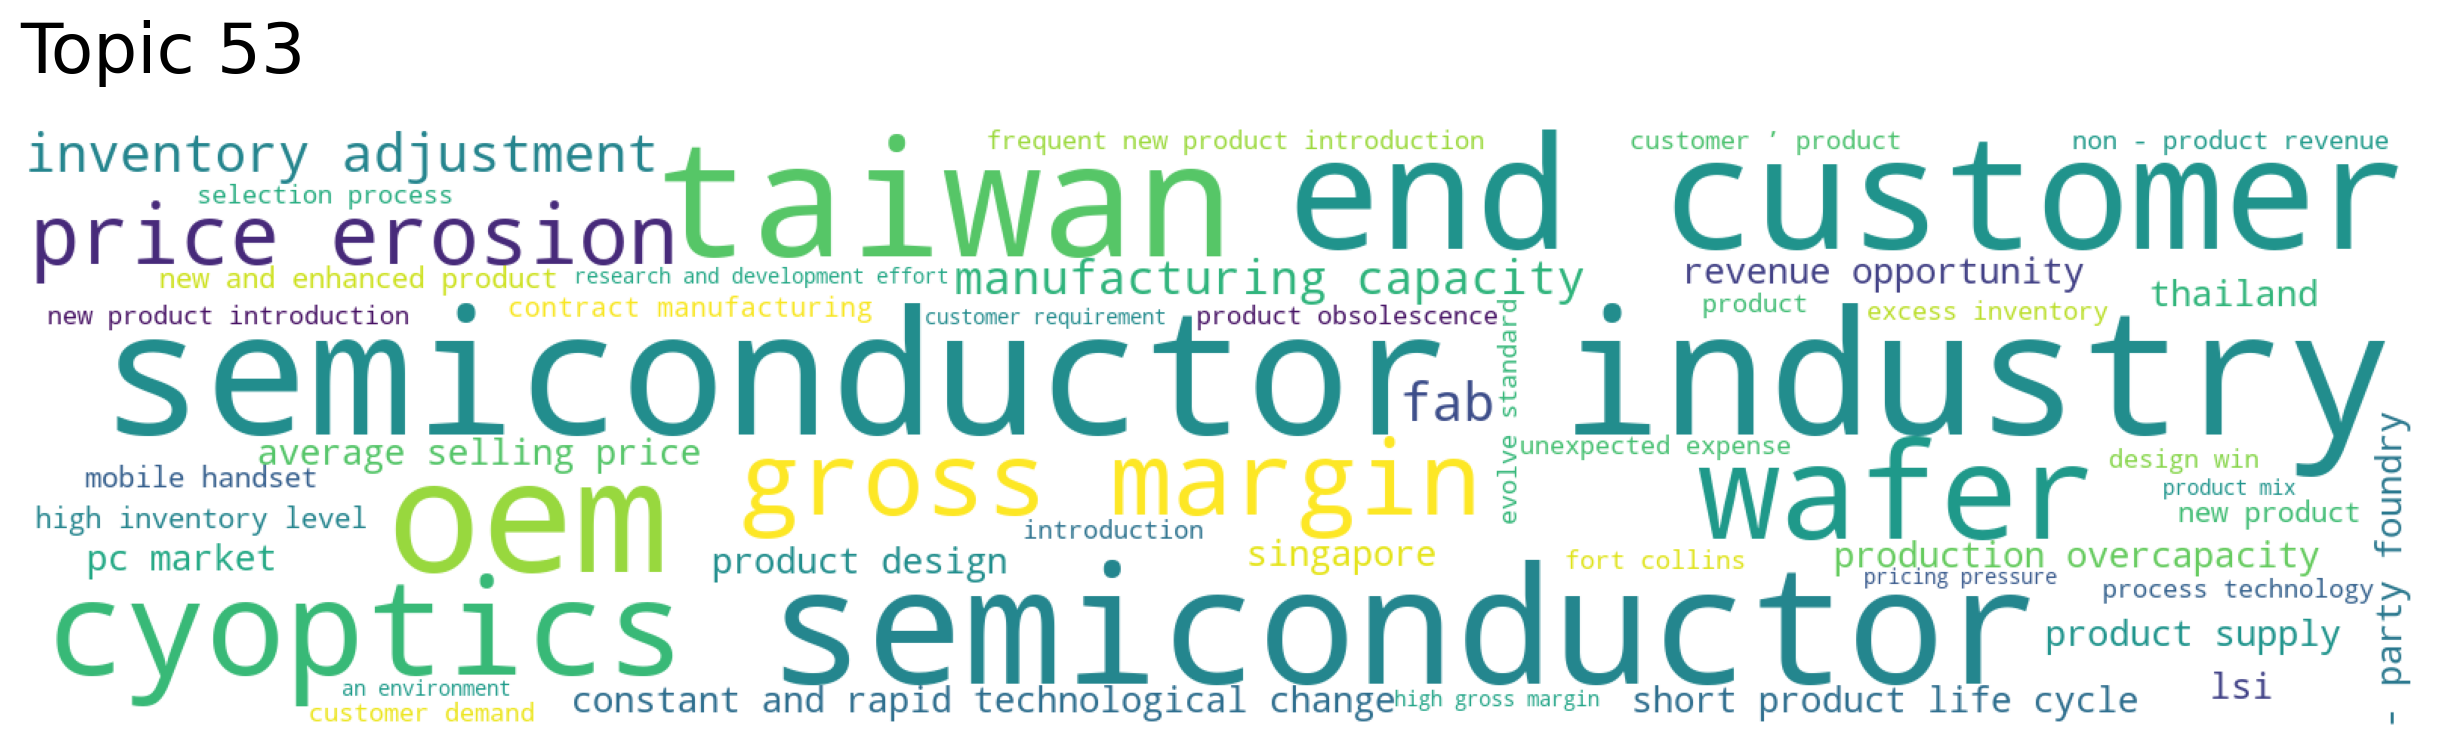

In [18]:
model.generate_topic_wordcloud(53, background_color='white')

In [19]:
model.save('noun_phrase_topic_model')

In [23]:
nlp = spacy.load('en_core_web_lg')

In [28]:
tokens = []
doc = nlp(docs[-1])
noun_chunks = doc.noun_chunks
curr_chunk = next(noun_chunks)

for tkn in doc:
    if curr_chunk:
        if tkn.i == curr_chunk.end - 1:
            # Last token for the curr noun chunk.
            # Add the noun chunk to the list of tokens.
            tokens.append(curr_chunk.lemma_)
            try:
                curr_chunk = next(noun_chunks)
            except StopIteration as e:
                curr_chunk = None
            continue
        elif curr_chunk.start <= tkn.i:
            # Wait for curr noun chunk to end
            continue
    
    if not tkn.is_stop and tkn.is_alpha:
        # Simple token. Add to list of tokens
        tokens.append(tkn.lemma_)

In [31]:
print(cleaner(docs[-1]))

['subject', 'risk', 'control', 'negative effect', 'financial condition', 'result', 'factor', 'experience', 'material fluctuation', 'future operating result', 'quarterly or annual basis', 'materially', 'adversely', 'affect', 'business', 'financial condition', 'operating result', 'stock price', 'investment', 'stock', 'involve', 'risk', 'include', 'mention', 'annual report', 'form', '10-k ( this " annual report', 'detail', 'time', 'time', 'other filing', 'securities and exchange commission', 'carefully', 'consider', 'follow risk factor', 'other information', 'include', 'incorporate', 'reference', 'annual report', 'decide', 'purchase', 'common stock', 'competitive business', 'real estate industry', 'highly', 'competitive', 'compete', 'tenant', 'unoccupied rental space', 'large number', 'real estate property owner', 'company', 'sublet', 'property', 'principal mean', 'competition', 'rent', 'charge', 'relation', 'income produce potential', 'location', 'addition', 'expect', 'major real estate 